In [1]:
#pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

Correlation Matrix:
               age  duration  campaign  previous     pdays
age       1.000000 -0.004648  0.004760  0.001288 -0.023758
duration -0.004648  1.000000 -0.084570  0.001203 -0.001565
campaign  0.004760 -0.084570  1.000000 -0.032855 -0.088628
previous  0.001288  0.001203 -0.032855  1.000000  0.454820
pdays    -0.023758 -0.001565 -0.088628  0.454820  1.000000


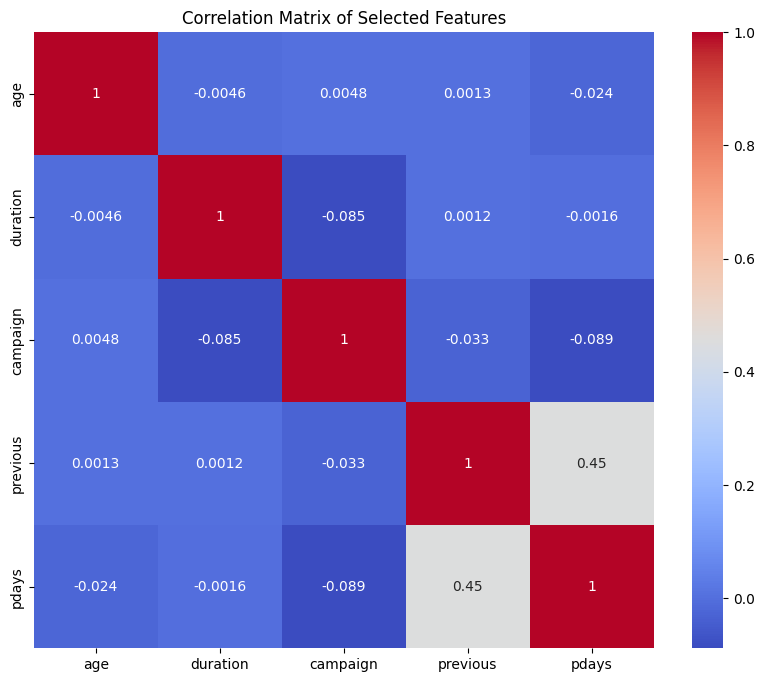

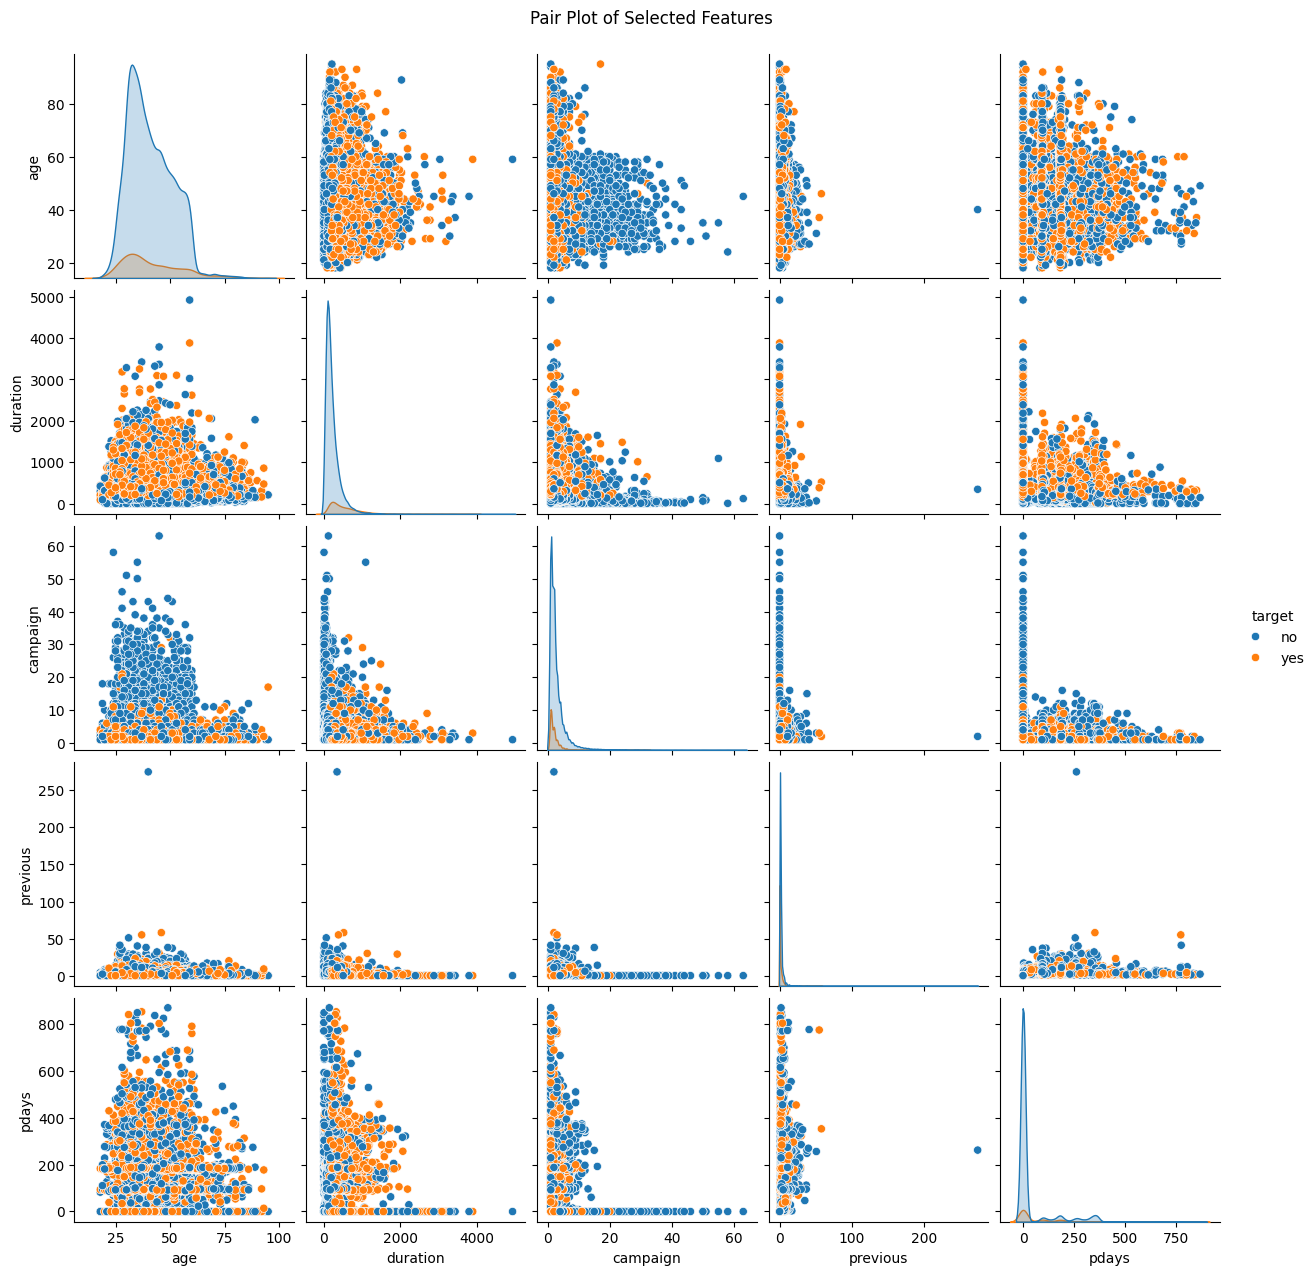

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Fetch dataset (assuming you've already done this in your environment)
from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Combine features and target into a single dataframe for correlation analysis
df = pd.concat([X, y], axis=1)

# Select up to 5 features for analysis (the following features have been selected)
selected_features = ['age', 'duration', 'campaign', 'previous', 'pdays']

# Correlation matrix for selected features
correlation_matrix = df[selected_features].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Pair plot using sns.pairplot
df['target'] = y # Add the target variable to the DataFrame
pairplot = df[ selected_features + ['target']] # Select the features and target variable
# Create a pairplot
sns.pairplot (pairplot , hue ='target', diag_kind ='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [10]:
correlation_with_target=(df[selected_features].corrwith(y))
print("Correlation with Encoded Target:")
print(correlation_with_target)

Correlation with Encoded Target:
age        NaN
campaign   NaN
duration   NaN
pdays      NaN
previous   NaN
y          NaN
dtype: float64


Fit Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn . metrics import accuracy_score , classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

X = df [ selected_features ] # Features
X_train , X_test , y_train , y_test = train_test_split ( X , y ,test_size =0.2 , random_state =50)

# Fit the Logistic Regression model
model = LogisticRegression()
model . fit ( X_train , y_train )

# Make predictions
y_pred = model . predict ( X_test )

# Model Performance
accuracy = accuracy_score ( y_test , y_pred )
conf_matrix = confusion_matrix ( y_test , y_pred )
class_report = classification_report ( y_test , y_pred )

print ( f" Accuracy : { accuracy :.2f}")
print (" Confusion Matrix :")
print ( conf_matrix )
print (" Classification Report :")
print ( class_report )

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Accuracy : 0.89
 Confusion Matrix :
[[7882  123]
 [ 856  182]]
 Classification Report :
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      8005
         yes       0.60      0.18      0.27      1038

    accuracy                           0.89      9043
   macro avg       0.75      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [17]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.0/9.9 MB 640.0 kB/s eta 0:00:16
   ---------------------------------------- 0.0/9.9 MB 245.8 kB/s eta 0:00:40
   ---------------------------------------- 0.1/9.9 MB 326.1 kB/s eta 0:00:31
   ---------------------------------------- 0.1/9.9 MB 504.4 kB/s eta 0:00:20
    --------------------------------------- 0.1/9.9 MB 500.5 kB/s eta 0:00:20
    --------------------------------------- 0.2/9.9 MB 621.6 kB/s eta 0:00:16
   - -------------------------------------- 0.3/9.9 MB 768.0 kB/s eta 0:00:13
   - -------------------------------------- 0.4/9.9 MB 855.4 kB/s eta 0:00:12
   - -------------------------------------- 0.5/9.9 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/9.9 MB 1.3 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.9 MB 1.4 MB/s eta 0:00:07
 

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the target variable y
y_encoded = le.fit_transform(y)

X_selected_with_constant = sm.add_constant(X)
model = sm.Logit(y_encoded, X_selected_with_constant)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.293968
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45205
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.1854
Time:                        18:53:30   Log-Likelihood:                -13291.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4880      0.070    -49.491      0.000      -3.626      -3.350
age            0.0092      0.

c:\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# Extract p- values
p_values = result . pvalues
print ("\nP - values for the predictors :")
print ( p_values )


P - values for the predictors :
const       0.000000e+00
age         2.732002e-10
duration    0.000000e+00
campaign    4.821695e-42
previous    1.984594e-32
pdays       1.202498e-42
dtype: float64
